In [12]:
# Initial imports

import os
import requests
import pandas as pd
import numpy as np
import datetime as dt
#import alpaca_trade_api as tradeapi
import seaborn as sns
#from dotenv import load_dotenv
#from MCForecastTools import MCSimulation
from pathlib import Path

from pandas_datareader import data as pdr

%matplotlib inline

In [13]:
# Define the 'get_data' function
'''def get_data(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start, end)
    stockData = stockData["Close"]
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

# Identify the Cryptos
stockList = ["ADA", "SOL", "BNB", "XRP", "ETH", "BTC"]
stocks = [stock + "-USD" for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365)


data = web.DataReader(stocks, start=startdate, end=enddate, data_source='yahoo')['Close']'''

'def get_data(stocks, start, end):\n    stockData = pdr.get_data_yahoo(stocks, start, end)\n    stockData = stockData["Close"]\n    returns = stockData.pct_change()\n    meanReturns = returns.mean()\n    covMatrix = returns.cov()\n    return meanReturns, covMatrix\n\n# Identify the Cryptos\nstockList = ["ADA", "SOL", "BNB", "XRP", "ETH", "BTC"]\nstocks = [stock + "-USD" for stock in stockList]\nendDate = dt.datetime.now()\nstartDate = endDate - dt.timedelta(days = 365)\n\n\ndata = web.DataReader(stocks, start=startdate, end=enddate, data_source=\'yahoo\')[\'Close\']'

# Crypto Selection
- According to market cap data from yahoo finance 
- Exclude cryptos closely linked to USD, e.g. USDT, USDC etc.
- Top 6 Cryptos which have the largest market cap

# Reading the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files (Data from Google Finance and time range from 3-1-2009 to 26-10-2022):
* BTC  
* ETH  
* BNB 
* XRP 
* ADA 
* SOL 

In [14]:
# Read in price data from CSV files

ada_path = Path("../Resources/ADA.csv")

ada_data = pd.read_csv(ada_path, index_col = 'Date', parse_dates = True,infer_datetime_format = True)

ada_data.index = ada_data.index.date

ada_data = ada_data.rename(columns={'Close':'ADA Close'})

ada_data

,ADA Close
2009-05-01,209.89
2009-06-01,217.25
2009-07-01,213.57
2009-08-01,213.57
2009-09-01,217.25
...,...
2022-03-10,4.50
2022-10-13,4.50
2022-10-20,4.50
2022-10-21,4.50


<AxesSubplot:title={'center':'ADA price history'}>

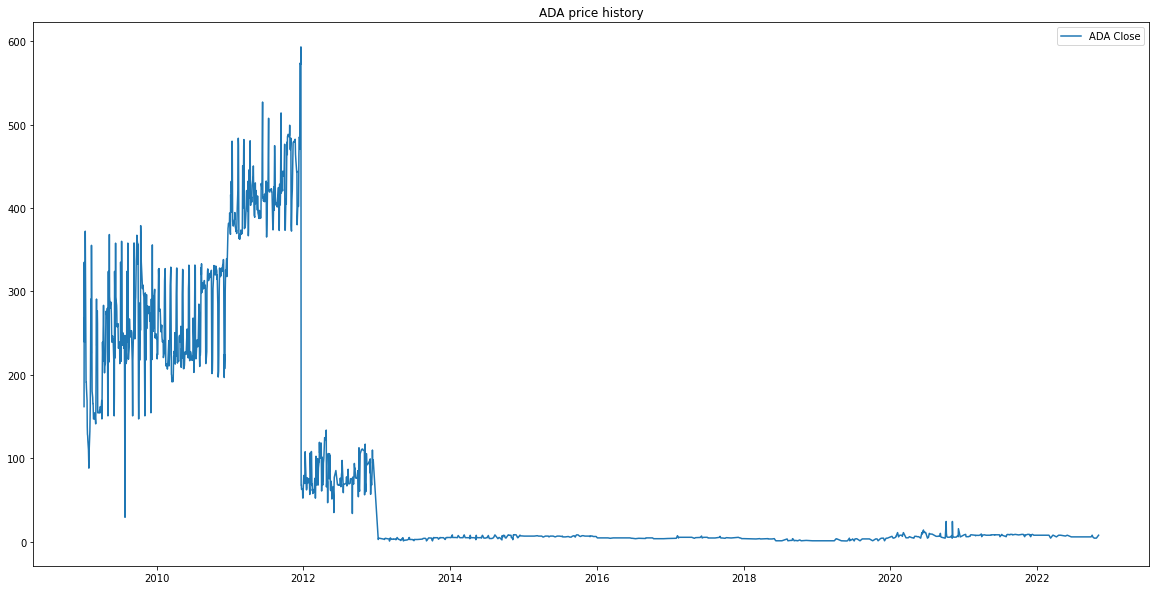

In [15]:
ada_data.plot(figsize=(20,10),title='ADA price history')

In [16]:
# Count nulls
ada_data.isnull().sum()

ADA Close    0
dtype: int64

In [17]:
# Calculate Daily Returns
ada_daily_return = ada_data.pct_change()

# Rename the column to 'ADA D_Return'

ada_daily_return = ada_daily_return.rename(columns={'Close':'ADA D_Return'})

ada_daily_return

,ADA Close
2009-05-01,NaN
2009-06-01,0.035066
2009-07-01,-0.016939
2009-08-01,0.000000
2009-09-01,0.017231
...,...
2022-03-10,-0.250000
2022-10-13,0.000000
2022-10-20,0.000000
2022-10-21,0.000000


In [18]:
# Read in SOL price data from CSV files

sol_path = Path("../Resources/SOL.csv")

sol_data = pd.read_csv(sol_path, index_col = 'Date', parse_dates = True,infer_datetime_format = True)

sol_data.index = sol_data.index.date

sol_data = sol_data.rename(columns={'Close':'SOL Close'})

sol_data

,SOL Close
2009-05-01,25.75
2009-06-01,25.65
2009-07-01,24.35
2009-08-01,23.85
2009-09-01,23.95
...,...
2022-10-19,4.29
2022-10-20,4.21
2022-10-21,4.25
2022-10-24,4.21


<AxesSubplot:title={'center':'SOL price history'}>

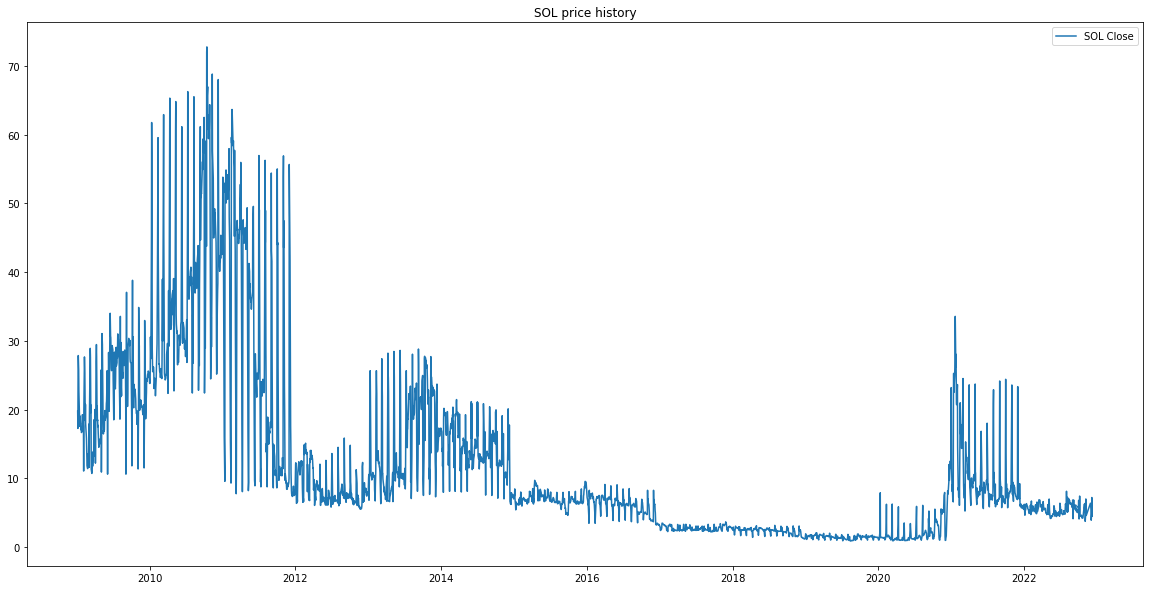

In [19]:
sol_data.plot(figsize=(20,10),title='SOL price history')

In [20]:
# Count nulls
sol_data.isnull().sum()

SOL Close    0
dtype: int64

In [21]:
sol_daily_return = sol_data.pct_change()

# Rename the column to 'SOL D_Return'

sol_daily_return = sol_daily_return.rename(columns={'Close':'SOL D_Return'})

sol_daily_return

,SOL Close
2009-05-01,NaN
2009-06-01,-0.003883
2009-07-01,-0.050682
2009-08-01,-0.020534
2009-09-01,0.004193
...,...
2022-10-19,-0.042411
2022-10-20,-0.018648
2022-10-21,0.009501
2022-10-24,-0.009412


In [22]:
# Read in BTC csv file
btc_path = Path("../Resources/BTC.csv")

btc_data = pd.read_csv(btc_path, index_col = 'Date', parse_dates = True,infer_datetime_format = True)

btc_data.index = btc_data.index.date

btc_data = btc_data.rename(columns={'Close':'BTC Close'})

btc_data


,BTC Close
2015-11-19,326.41
2015-11-20,322.39
2015-11-21,327.00
2015-11-22,323.71
2015-11-23,323.00
...,...
2022-10-21,19173.00
2022-10-22,19206.50
2022-10-23,19572.40
2022-10-24,19330.40


<AxesSubplot:title={'center':'BTC price history'}>

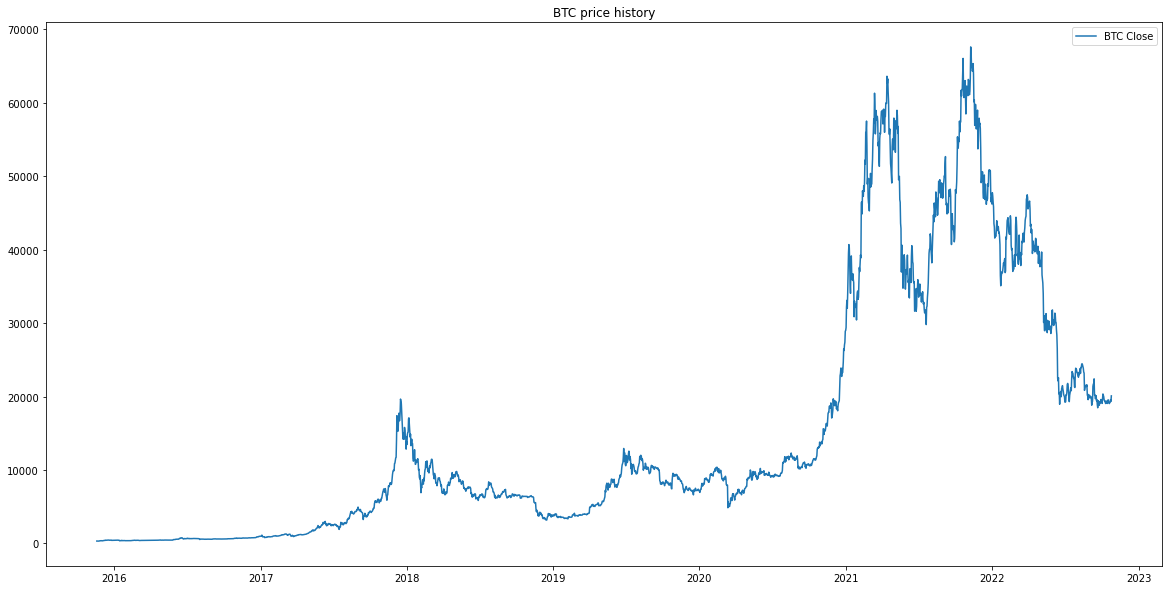

In [23]:
btc_data.plot(figsize=(20,10),title='BTC price history')

In [24]:
# Count nulls
btc_data.isnull().sum()

BTC Close    0
dtype: int64

In [25]:
# Calculate Daily Returns
btc_daily_return = btc_data.pct_change()

# Rename the column to 'BTC D_Return'

btc_daily_return = btc_daily_return.rename(columns={'Close':'BTC D_Return'})

btc_daily_return

,BTC Close
2015-11-19,NaN
2015-11-20,-0.012316
2015-11-21,0.014299
2015-11-22,-0.010061
2015-11-23,-0.002193
...,...
2022-10-21,0.006943
2022-10-22,0.001747
2022-10-23,0.019051
2022-10-24,-0.012364


In [26]:
# Read in BNB csv file
bnb_path = Path("../Resources/BNB.csv")

bnb_data = pd.read_csv(bnb_path, index_col = 'Date', parse_dates = True,infer_datetime_format = True)

bnb_data.index = bnb_data.index.date

bnb_data =bnb_data.rename(columns={'Close':'BNB Close'})

bnb_data

,BNB Close
2009-05-01,2401.16
2009-06-01,2435.00
2009-07-01,2412.06
2009-08-01,2419.94
2009-09-01,2400.00
...,...
2022-10-19,762.00
2022-10-20,720.00
2022-10-21,750.00
2022-10-24,762.00


<AxesSubplot:title={'center':'BNB price history'}>

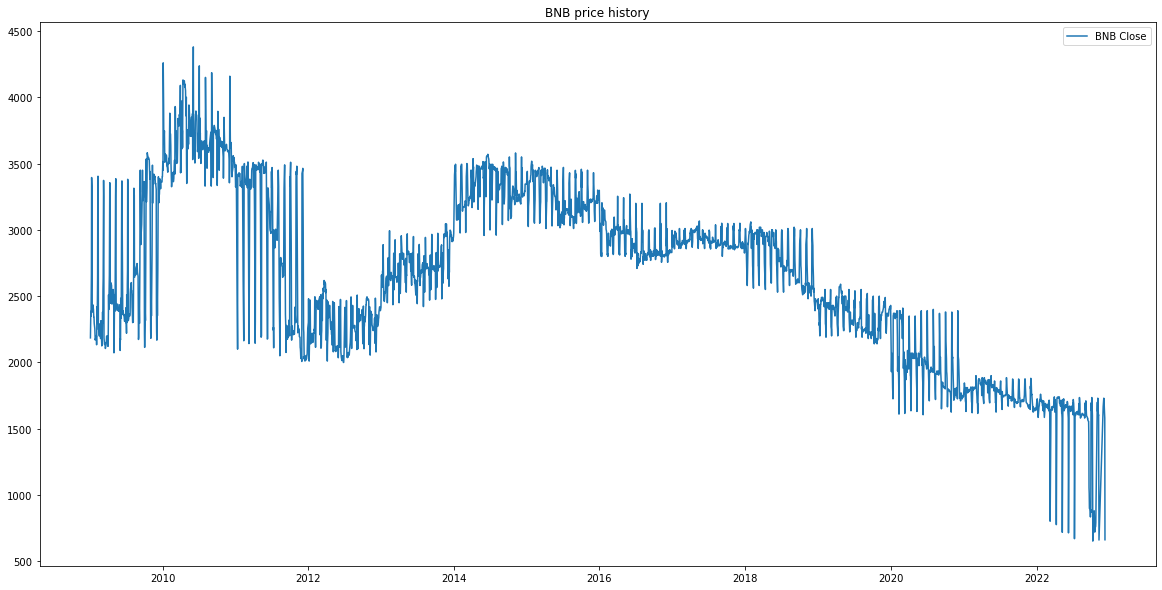

In [27]:
bnb_data.plot(figsize=(20,10),title='BNB price history')

In [28]:
# Count nulls
bnb_data.isnull().sum()

BNB Close    0
dtype: int64

In [29]:
# Calculate Daily Returns
bnb_daily_return = bnb_data.pct_change()

# Rename the column to 'BNB D_Return'

bnb_daily_return = bnb_daily_return.rename(columns={'Close':'BNB D_Return'})

bnb_daily_return

,BNB Close
2009-05-01,NaN
2009-06-01,0.014093
2009-07-01,-0.009421
2009-08-01,0.003267
2009-09-01,-0.008240
...,...
2022-10-19,-0.047500
2022-10-20,-0.055118
2022-10-21,0.041667
2022-10-24,0.016000


In [30]:
# Raad in ETH csv file
eth_path = Path("../Resources/ETH.csv")

eth_data = pd.read_csv(eth_path, index_col = 'Date', parse_dates = True,infer_datetime_format = True)

eth_data.index = eth_data.index.date

eth_data =eth_data.rename(columns={'Close':'ETH Close'})

eth_data

,ETH Close
2016-10-14,11.92
2016-10-15,11.95
2016-10-16,11.95
2016-10-17,11.96
2016-10-18,12.54
...,...
2022-10-22,1313.89
2022-10-23,1364.06
2022-10-24,1343.75
2022-10-25,1460.30


<AxesSubplot:title={'center':'ETH price history'}>

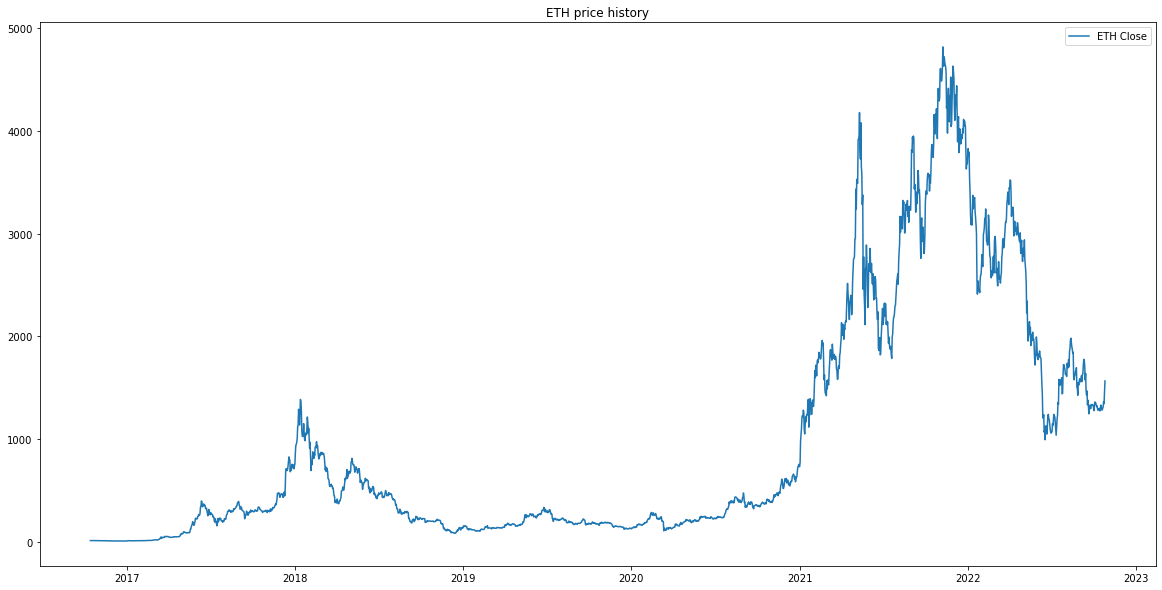

In [31]:
eth_data.plot(figsize=(20,10),title='ETH price history')

In [32]:
# Count nulls
eth_data.isnull().sum()

ETH Close    0
dtype: int64

In [33]:
# Calculate Daily Returns
eth_daily_return = eth_data.pct_change()

# Rename the column to 'BNB D_Return'

eth_daily_return = eth_daily_return.rename(columns={'Close':'ETH D_Return'})

eth_daily_return

,ETH Close
2016-10-14,NaN
2016-10-15,0.002517
2016-10-16,0.000000
2016-10-17,0.000837
2016-10-18,0.048495
...,...
2022-10-22,0.010630
2022-10-23,0.038184
2022-10-24,-0.014889
2022-10-25,0.086735


In [34]:
# Raad in XRP csv file
xrp_path = Path("../Resources/XRP.csv")

xrp_data = pd.read_csv(xrp_path, index_col = 'Date', parse_dates = True,infer_datetime_format = True)

xrp_data.index = xrp_data.index.date

xrp_data =xrp_data.rename(columns={'Close':'XRP Close'})

xrp_data

,XRP Close
2017-10-23,0.177415
2017-10-24,0.167556
2017-10-25,0.170141
2017-10-26,0.175370
2017-10-27,0.172716
...,...
2022-10-22,0.465488
2022-10-23,0.469665
2022-10-24,0.453703
2022-10-25,0.461543


<AxesSubplot:title={'center':'XRP price history'}>

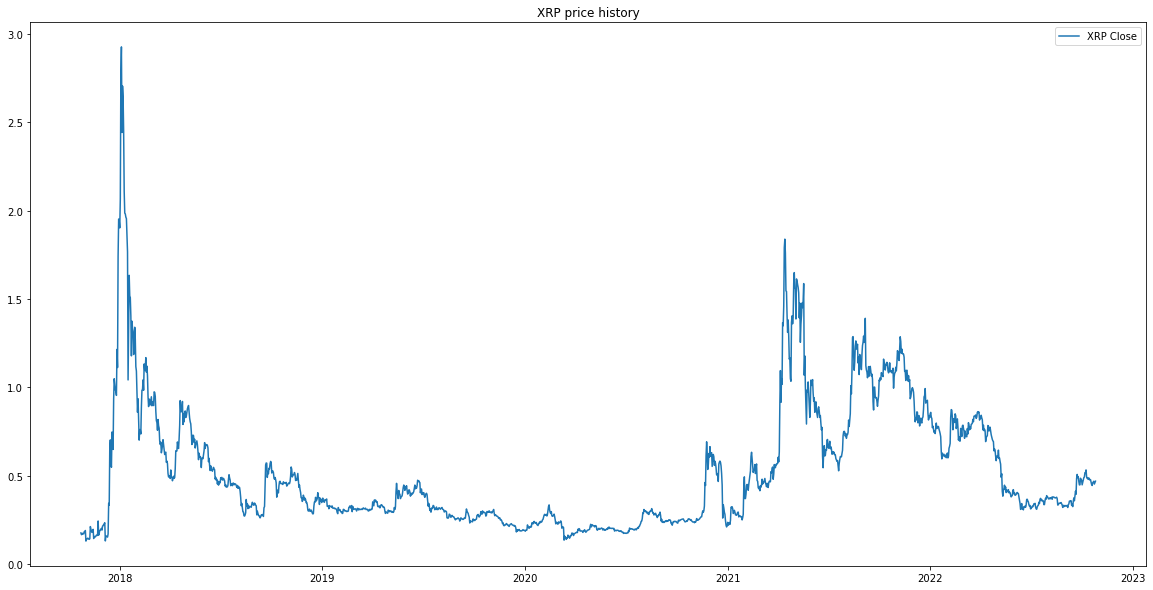

In [35]:
xrp_data.plot(figsize=(20,10),title='XRP price history')

In [36]:
# Count nulls
xrp_data.isnull().sum()

XRP Close    0
dtype: int64

In [37]:
combined_price = pd.concat([btc_data,eth_data,bnb_data,xrp_data,ada_data,sol_data],axis='columns',join = 'inner')
combined_price



,BTC Close,ETH Close,BNB Close,XRP Close,ADA Close,SOL Close
2017-10-31,6445.01,303.51,2855.00,0.191211,4.68,2.88
2017-12-06,14090.00,432.49,2945.00,0.132274,5.46,2.40
2017-12-14,16749.78,705.01,2861.70,0.657867,4.68,2.94
2017-12-18,19039.01,785.65,2910.00,0.747993,4.68,3.03
2017-12-22,14210.57,682.11,2859.85,1.049011,3.90,2.88
...,...,...,...,...,...,...
2022-10-06,19965.60,1352.24,1690.00,0.493522,6.00,4.57
2022-10-13,19378.60,1288.00,730.00,0.480073,4.50,4.48
2022-10-20,19040.80,1282.55,720.00,0.445671,4.50,4.21
2022-10-21,19173.00,1300.07,750.00,0.460689,4.50,4.25


<AxesSubplot:title={'center':'Price History of the 6 Cryptos'}>

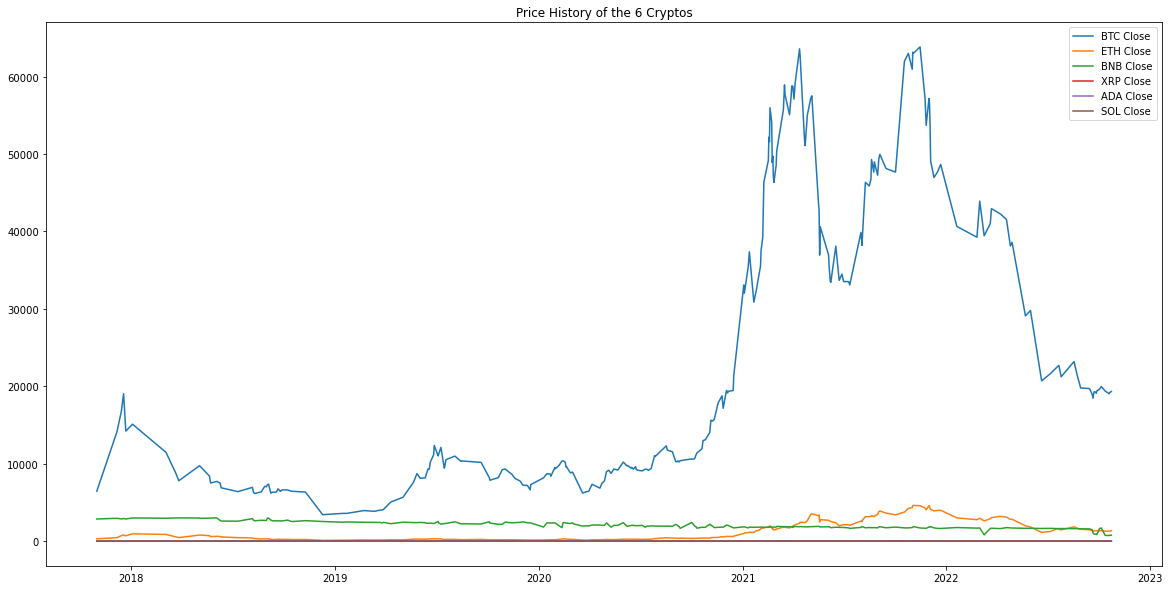

In [38]:
combined_price.plot(figsize=(20,10),title='Price History of the 6 Cryptos')

In [39]:
# Calculate Daily Returns
xrp_daily_return = xrp_data.pct_change()

# Rename the column to 'BNB D_Return'

xrp_daily_return = xrp_daily_return.rename(columns={'Close':'XRP D_Return'})

xrp_daily_return

,XRP Close
2017-10-23,NaN
2017-10-24,-0.055568
2017-10-25,0.015430
2017-10-26,0.030730
2017-10-27,-0.015134
...,...
2022-10-22,0.010417
2022-10-23,0.008975
2022-10-24,-0.033987
2022-10-25,0.017281


In [40]:
# Join All Returns into a single DataFrame with columns for each portfolio's returns.

combined = pd.concat([btc_daily_return,eth_daily_return,bnb_daily_return,xrp_daily_return,ada_daily_return,sol_daily_return],axis='columns',join = 'inner')

combined.dropna(inplace=True)
combined

,BTC Close,ETH Close,BNB Close,XRP Close,ADA Close,SOL Close
2017-10-31,0.052391,-0.010949,-0.005209,0.044092,0.000000,-0.013699
2017-12-06,0.202388,-0.054253,-0.015034,-0.437412,-0.176471,0.016949
2017-12-14,0.003605,-0.009734,-0.002892,0.970206,0.000000,0.010309
2017-12-18,-0.017544,0.073028,0.018105,0.363291,0.000000,0.023649
2017-12-22,-0.098245,-0.144132,0.000297,0.120486,-0.166667,0.006993
...,...,...,...,...,...,...
2022-10-06,-0.010144,-0.000805,0.000000,0.007424,-0.142857,-0.067347
2022-10-13,0.011731,-0.005021,0.102719,-0.015899,0.000000,0.000000
2022-10-20,-0.004574,-0.001852,-0.055118,-0.012772,0.000000,-0.018648
2022-10-21,0.006943,0.013660,0.041667,0.033697,0.000000,0.009501


<AxesSubplot:title={'center':'Daily Return of All Portfolios'}>

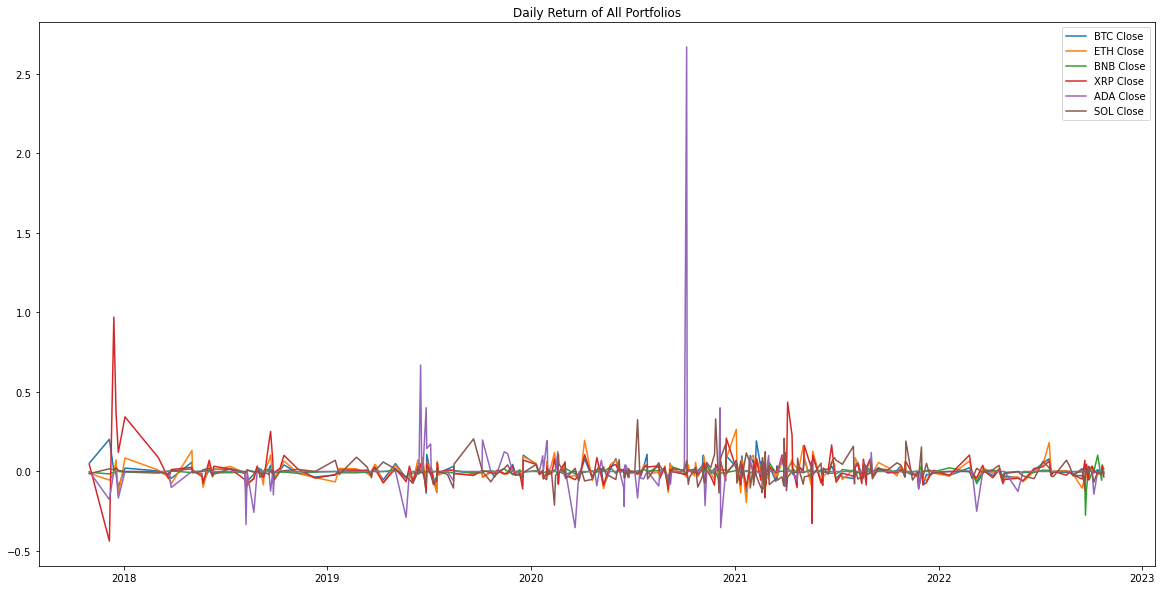

In [41]:
# plot the daily return of the 6 cryptos

combined.plot(figsize=(20,10),title='Daily Return of All Portfolios')

In [42]:
# Calculate cumulative returns of the 6 cryptos

cumulative_return = (1 + combined).cumprod()-1

cumulative_return



,BTC Close,ETH Close,BNB Close,XRP Close,ADA Close,SOL Close
2017-10-31,0.052391,-0.010949,-0.005209,0.044092,0.000000,-0.013699
2017-12-06,0.265382,-0.064608,-0.020165,-0.412606,-0.176471,0.003018
2017-12-14,0.269944,-0.073714,-0.022998,0.157287,-0.176471,0.013359
2017-12-18,0.247664,-0.006068,-0.005309,0.577719,-0.176471,0.037323
2017-12-22,0.125087,-0.149325,-0.005013,0.767812,-0.313725,0.044577
...,...,...,...,...,...,...
2022-10-06,-0.037687,-0.006273,-0.590979,1.625120,-0.282087,-0.384829
2022-10-13,-0.026398,-0.011262,-0.548965,1.583383,-0.282087,-0.384829
2022-10-20,-0.030852,-0.013094,-0.573825,1.550389,-0.282087,-0.396301
2022-10-21,-0.024123,0.000388,-0.556068,1.636330,-0.282087,-0.390565


In [43]:
cumulative_return.index

Index([2017-10-31, 2017-12-06, 2017-12-14, 2017-12-18, 2017-12-22, 2018-01-03,
       2018-03-04, 2018-03-22, 2018-03-27, 2018-05-03,
       ...
       2022-09-23, 2022-09-26, 2022-09-27, 2022-09-28, 2022-10-03, 2022-10-06,
       2022-10-13, 2022-10-20, 2022-10-21, 2022-10-24],
      dtype='object', length=271)

<AxesSubplot:>

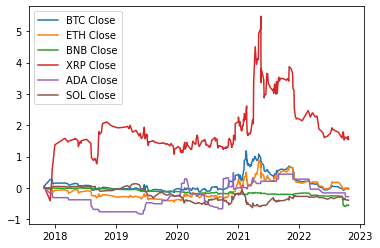

In [44]:
# Plot cumulative returns

cumulative_return.plot()


In [45]:
# plot the moving average

In [46]:
# plot the volatilities of the 6 cryptos

In [47]:
# plot the Sharpe Ratio of the 6 cryptos

In [48]:
# Calculate the daily standard deviations

combined_std = combined.std()
combined_std

BTC Close    0.044283
ETH Close    0.058412
BNB Close    0.023208
XRP Close    0.095237
ADA Close    0.183341
SOL Close    0.060970
dtype: float64

<AxesSubplot:title={'center':'Standard Deviation of the 6 Cryptos'}>

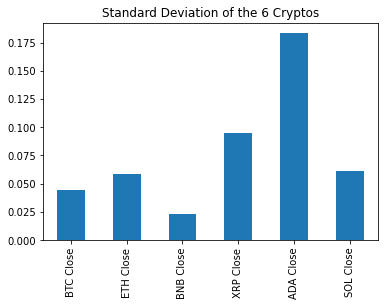

In [49]:
# Plot the Standard Deviation of the 6 Cryptos

combined_std.plot(kind = 'bar',title='Standard Deviation of the 6 Cryptos')



In [50]:
########## plot the rolling std (30 days, 60 days) of the 6 cryptos

In [51]:
######### plot the heatmap

In [52]:
######## CVI - crypto volatility index

In [53]:
######### S&P (SPY) and ASX

In [54]:
######### Porforlios : do some research

# Comparison between Dollar-Cost Averaging and Lump Sum Investment in 5 years time range

In [55]:
# Within 5 years time period, get the close price once every month, calculate the amount by 100/close_price
# get the sum amount and calculate the value by the final close price*sum_amount

In [56]:
btc_data_slice = btc_data[650:]
btc_data_slice

,BTC Close
2017-08-30,4581.98
2017-08-31,4743.94
2017-09-01,4947.99
2017-09-02,4649.99
2017-09-03,4626.05
...,...
2022-10-21,19173.00
2022-10-22,19206.50
2022-10-23,19572.40
2022-10-24,19330.40


In [57]:
# 52 weeks in one year, 52*5/12 = 65 months
# suppose we started investing from the first date in the dataframe which is 2017-10-31 and invest $100 every month



cal_times = 0
i = 0
amount = 0


while cal_times < 65:

        print(btc_data_slice.index[i])
        price = btc_data_slice.iloc[i,0]

        amount = amount + 100/price
        
        print(price,amount)
    
        i = i + 28
    
        cal_times += 1
    
        print(cal_times)
    
last_date_time =  btc_data_slice.index[i-28]
last_price_btc = btc_data_slice.iloc[i-28,0]

print(f'total amount of btc:{amount}')
print(f'last date time is:{last_date_time}')
print(f'last price of btc is:{last_price_btc}')

dca_btc_value = amount * last_price_btc

dca_btc_value

2017-08-30
4581.98 0.021824626035032893
1
2017-09-27
4200.0 0.0456341498445567
2
2017-10-25
5739.97 0.06305584368616214
3
2017-11-22
8250.0 0.07517705580737426
4
2017-12-20
16496.89 0.08123880441574832
5
2018-01-17
11200.01 0.09016736787238809
6
2018-02-14
9472.98 0.10072370811590176
7
2018-03-14
8207.02 0.11290839878315978
8
2018-04-11
6942.99 0.12731141535094975
9
2018-05-09
9300.08 0.1380640110275461
10
2018-06-06
7655.0 0.15112736831036777
11
2018-07-04
6587.47 0.16630770309747117
12
2018-08-01
7603.99 0.17945869356431818
13
2018-08-29
7030.9 0.19368162377239964
14
2018-09-26
6455.66 0.20917190671790792
15
2018-10-24
6415.98 0.22475799021567444
16
2018-11-21
4545.11 0.2467596579420881
17
2018-12-19
3682.51 0.273915049237699
18
2019-01-16
3609.71 0.30161810571592024
19
2019-02-13
3576.68 0.3295769949651681
20
2019-03-13
3851.02 0.35554414133158535
21
2019-04-10
5320.81 0.3743382723003664
22
2019-05-08
5943.6 0.3911630922747927
23
2019-06-05
7789.48 0.40400091970358126
24
2019-07-03


15168.420052968864

In [58]:
btc_cumprod = (btc_daily_return+1).cumprod()-1



btc_cumprod.index=pd.to_datetime(btc_cumprod.index)

btc_cumprod.loc['2022-07-27']

#btc_cumprod.index

BTC Close    69.30912
Name: 2022-07-27 00:00:00, dtype: float64

In [ ]:

initail_amount = 6000
initial_price = btc_inv_price.iloc[0,2]
last_price = btc_inv_price.iloc[-1,2]
amount = 6000/initial_price
lump_sum_value = amount * last_price

print(f'Invest 6000 at 2017-08-01 will acquire {amount} cryptos, hold and wait for 5 years, the cryptos will be valued at {lump_sum_value}')

In [59]:
# A Lump Sum Investment Vs. DCA(Dollar-Cost Averaging) Investment Comparison

# $6500 in the beginning Vs. $100 per month from 2017-2022

# (52*5/4)*100 = 6500

last_date_time

initail_amount = 6500

cum_return_btc = btc_cumprod.loc['2022-07-27']


print(f'cum_return_btc:{cum_return_btc}')



compound_return_btc = initail_amount * cum_return_btc


print(f'compound_return_btc:{compound_return_btc}')


cum_return_btc:BTC Close    69.30912
Name: 2022-07-27 00:00:00, dtype: float64
compound_return_btc:BTC Close    450509.282804
Name: 2022-07-27 00:00:00, dtype: float64


In [60]:
# Monte Carlo Simulation in 1, 5, 10 years of different poforlios